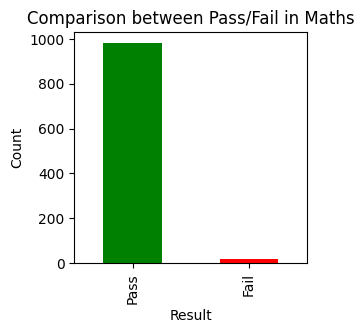

,count
pass_math,
Pass,981
Fail,19


In [6]:
passingmark=33
sp['pass_math'] = np.where(sp['math score']>= passingmark, 'Pass', 'Fail')
sp['pass_math'].value_counts(dropna = False).plot.bar(color=['green','red'], figsize = (3,3))

plt.title('Comparison between Pass/Fail in Maths')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()
sp['pass_math'].value_counts()